In [207]:
# Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [208]:
# Rename & load data

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [209]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [210]:
# Total rides by type, remove index title

c_tot_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
c_tot_rides = c_tot_rides.rename_axis(None)

In [211]:
# Total Drivers for each city type

unique_cities = pyber_data_df.drop_duplicates(["city"])

c_tot_drivers = unique_cities.groupby(["type"]).sum()["driver_count"]
c_tot_drivers = c_tot_drivers.rename_axis(None)

In [212]:
# Total fares by type, remove index title

c_tot_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
c_tot_fares = c_tot_fares.rename_axis(None)

In [213]:
# Average ride fare by type, remove index title

c_avg_ride_fare = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
c_avg_ride_fare = c_avg_ride_fare.rename_axis(None)

In [214]:
# Average driver fare by type, remove index title

c_avg_driver_fare = pyber_data_df.groupby(["type"]).sum()["fare"] / unique_cities.groupby(["type"])["driver_count"].sum()
c_avg_driver_fare = c_avg_driver_fare.rename_axis(None)

In [215]:
# Create dictionary from groups

d = {'Total Rides': c_tot_rides, 'Total Drivers': c_tot_drivers, 'Total Fares': c_tot_fares, 'Average Fare per Ride': c_avg_ride_fare, 'Average Fare per Driver': c_avg_driver_fare}
summary_DataFrame = pd.DataFrame(data=d)

In [216]:
# Change the formats in the summary dataframe

summary_DataFrame.style.format({"Total Fares": "${:,.2f}", 
                          "Average Fare per Ride": "${:,.2f}", 
                          "Average Fare per Driver": "${:,.2f}",
                          })

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [217]:
# Rename columns in merged databases, change date column to datetime

pyber_data_df.rename(columns = {'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id':'Ride Id', 'driver_count':'No. Drivers', 'type':'City Type'}, inplace = True)
pyber_data_df[["Date"]] = pyber_data_df[["Date"]].apply(pd.to_datetime)

In [218]:
# Data print with new column names

pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [219]:
# New dataframe using copy()

new_data = pyber_data_df[['Date', 'City Type', 'Fare']].copy()
new_data.set_index('Date').head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [220]:
# Check that date index is set to datetime

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [221]:
# Calculate the sum of the fares by the type of city and date using groupby to create a series

sum_of_fares = new_data.groupby(["City Type", "Date"]).sum()["Fare"]

In [222]:
sum_of_fares

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [223]:
sum_of_fares = pd.DataFrame(sum_of_fares)
sum_of_fares = sum_of_fares.reset_index()
sum_of_fares

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [224]:
final_table = pd.pivot_table(sum_of_fares, index="Date",columns="City Type")


In [225]:
final_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [226]:
# Create a new dataframe from the pivot table dataframe

final_2 = final_table.loc['2019-01-01':'2019-04-28'].resample('1W').sum()

In [227]:
final_2

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

In [228]:
# Using the object-oriented interface method, plot the DataFrame above using the df.plot() function

# Import the style from Matplotlib.
# Use the FiveThirtyEight graph style.
# Add a title.
# Add x- and y-axis labels according to the final figure.
# Save the figure to the “analysis” folder.
# Make the figure size large enough so it’s not too small.

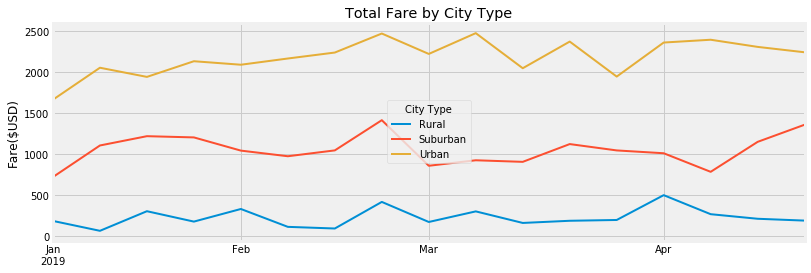

In [247]:
final_2.plot(title="Total Fare by City Type", figsize = (12,4),linewidth=2)
plt.ylabel("Fare($USD)")
plt.xlabel("")
plt.legend(["Rural", "Suburban", "Urban"],loc=10, title="City Type")
plt.savefig("analysis/Total_Fare_by_City_Type.png")
plt.show()